## Load and analyze DMPS @ Zeppelin

In [47]:
import dominics_functions as fu
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime 
import seaborn as sns
import scipy as sc

# These lines auto-updates the functions in other packages which is useful if these functions are changed. 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
path = 'C:\\Users\\Lovisa\\Documents\\Courses II\\E_science_tools HT22\\Project\\DATA_ZEP_2010to2020\\'

In [49]:
import glob 
glob.glob(path+'\\*')

['C:\\Users\\Lovisa\\Documents\\Courses II\\E_science_tools HT22\\Project\\DATA_ZEP_2010to2020\\DMPS_and_CPC_2010_QA_QC@STP_HARMONIZED_PT20210207.dat',
 'C:\\Users\\Lovisa\\Documents\\Courses II\\E_science_tools HT22\\Project\\DATA_ZEP_2010to2020\\DMPS_and_CPC_2011_QA_QC@STP_HARMONIZED_PT20210207.dat',
 'C:\\Users\\Lovisa\\Documents\\Courses II\\E_science_tools HT22\\Project\\DATA_ZEP_2010to2020\\DMPS_and_CPC_2012_QA_QC@STP_HARMONIZED_PT20210207.dat',
 'C:\\Users\\Lovisa\\Documents\\Courses II\\E_science_tools HT22\\Project\\DATA_ZEP_2010to2020\\DMPS_and_CPC_2013_QA_QC@STP_HARMONIZED_PT20210207.dat',
 'C:\\Users\\Lovisa\\Documents\\Courses II\\E_science_tools HT22\\Project\\DATA_ZEP_2010to2020\\DMPS_and_CPC_2014_QA_QC@STP_HARMONIZED_PT20210207.dat',
 'C:\\Users\\Lovisa\\Documents\\Courses II\\E_science_tools HT22\\Project\\DATA_ZEP_2010to2020\\DMPS_and_CPC_2015_QA_QC@STP_HARMONIZED_PT20210207.dat',
 'C:\\Users\\Lovisa\\Documents\\Courses II\\E_science_tools HT22\\Project\\DATA_ZEP_2010

In [50]:
DFs_2010_2020 = fu.load_and_append_2010_2020(path, 
                             name_in_file='DMPS')

['Year', 'Month', 'Day', 'Hour', 'Minute', 'UFCPC', 'CPC3010', 'Ntot', 'unknown4', 'unknown5', 'unknown6', 'unknown7', 'unknown8', '5.0118723e-09', '5.6234133e-09', '6.3095734e-09', '7.0794578e-09', '7.9432823e-09', '8.9125094e-09', '1.0000000e-08', '1.1220185e-08', '1.2589254e-08', '1.4125375e-08', '1.5848932e-08', '1.7782794e-08', '1.9952623e-08', '2.2387211e-08', '2.5118864e-08', '2.8183829e-08', '3.1622777e-08', '3.5481339e-08', '3.9810717e-08', '4.4668359e-08', '5.0118723e-08', '5.6234133e-08', '6.3095734e-08', '7.0794578e-08', '7.9432823e-08', '8.9125094e-08', '1.0000000e-07', '1.1220185e-07', '1.2589254e-07', '1.4125375e-07', '1.5848932e-07', '1.7782794e-07', '1.9952623e-07', '2.2387211e-07', '2.5118864e-07', '2.8183829e-07', '3.1622777e-07', '3.5481339e-07', '3.9810717e-07', '4.4668359e-07', '5.0118723e-07', '5.6234133e-07', '6.3095734e-07', '7.0794578e-07', 'flag']
C:\Users\Lovisa\Documents\Courses II\E_science_tools HT22\Project\DATA_ZEP_2010to2020\DMPS_and_CPC_2010_QA_QC@STP

In [51]:
fu.get_columns_2010_2020?

In [52]:
df_2010_2020 = fu.concat_df_2010_2020(DFs_2010_2020)
dict_years_to_df = {"2010_2020":df_2010_2020}

In [53]:
uniqueFlags = df_2010_2020['flag'].unique()
flags = df_2010_2020['flag'].values
nanFlags = np.isnan(flags)

In [54]:
nanFlags[nanFlags == True]

array([], dtype=bool)

In [55]:
nanFlags[nanFlags]

array([], dtype=bool)

In [56]:
bin_col_names_2010_2020 = ['5.0118723e-09', '5.6234133e-09', '6.3095734e-09',
   '7.0794578e-09', '7.9432823e-09', '8.9125094e-09', '1.0000000e-08',
   '1.1220185e-08', '1.2589254e-08', '1.4125375e-08', '1.5848932e-08',
   '1.7782794e-08', '1.9952623e-08', '2.2387211e-08', '2.5118864e-08',
   '2.8183829e-08', '3.1622777e-08', '3.5481339e-08', '3.9810717e-08',
   '4.4668359e-08', '5.0118723e-08', '5.6234133e-08', '6.3095734e-08',
   '7.0794578e-08', '7.9432823e-08', '8.9125094e-08', '1.0000000e-07',
   '1.1220185e-07', '1.2589254e-07', '1.4125375e-07', '1.5848932e-07',
   '1.7782794e-07', '1.9952623e-07', '2.2387211e-07', '2.5118864e-07',
   '2.8183829e-07', '3.1622777e-07', '3.5481339e-07', '3.9810717e-07',
   '4.4668359e-07', '5.0118723e-07', '5.6234133e-07', '6.3095734e-07',
   '7.0794578e-07']

def get_bins(bin_col_names_2010_2020):
    bin_col_names_2010_2020_floats = [float(i)*10**9 for i in bin_col_names_2010_2020]
    bin_cols = np.around(bin_col_names_2010_2020_floats,decimals=3)
    bin_cols = np.asarray(bin_cols)
    bin_cols = [str(x) for x in bin_cols] # Loop over all list things and change them to str 
    return bin_cols

In [57]:
def renameDpColumns(df_2010_2020, bin_col_names_2010_2020):
    bin_cols = get_bins(bin_col_names_2010_2020)

    # Rename all columns 
    
    dict_cols_to_goodnames = dict(zip(bin_col_names_2010_2020, bin_cols))
   
    df_2010_2020 = df_2010_2020.rename(dict_cols_to_goodnames, axis=1)
    
    return df_2010_2020

In [58]:
df_2010_2020 = renameDpColumns(df_2010_2020, bin_col_names_2010_2020)
df_2010_2020.head(10)
print(df_2010_2020['flag'].unique())

[0.]


In [59]:
# Make a list of all the "real" diameters

GMDs = ['5.0118723e-09', '5.6234133e-09', '6.3095734e-09',
       '7.0794578e-09', '7.9432823e-09', '8.9125094e-09', '1.0000000e-08',
       '1.1220185e-08', '1.2589254e-08', '1.4125375e-08', '1.5848932e-08',
       '1.7782794e-08', '1.9952623e-08', '2.2387211e-08', '2.5118864e-08',
       '2.8183829e-08', '3.1622777e-08', '3.5481339e-08', '3.9810717e-08',
       '4.4668359e-08', '5.0118723e-08', '5.6234133e-08', '6.3095734e-08',
       '7.0794578e-08', '7.9432823e-08', '8.9125094e-08', '1.0000000e-07',
       '1.1220185e-07', '1.2589254e-07', '1.4125375e-07', '1.5848932e-07',
       '1.7782794e-07', '1.9952623e-07', '2.2387211e-07', '2.5118864e-07',
       '2.8183829e-07', '3.1622777e-07', '3.5481339e-07', '3.9810717e-07',
       '4.4668359e-07', '5.0118723e-07', '5.6234133e-07', '6.3095734e-07',
       '7.0794578e-07']
diameterList = [float(i) for i in GMDs]
diameters = np.asarray(diameterList)
print(diameters.shape)

(44,)


In [60]:
dict_years_to_df = fu.resample_dfs(dict_years_to_df, "2010_2020")

### Resampling 

In [61]:
df_daily_2010_2020_mean = df_2010_2020.resample('D').mean()
df_daily_2010_2020_mean = df_daily_2010_2020_mean.dropna(how='all')

df_daily_2010_2020_median = df_2010_2020.resample('D').median()
print(len(df_daily_2010_2020_median))
df_daily_2010_2020_median = df_daily_2010_2020_median.dropna(how='all') 
# resample fills the gaps with nan's. All rows where all are equal to nan are dropped


df_hourly_2010_2020_mean = df_2010_2020.resample('H').mean()
df_hourly_2010_2020_mean = df_hourly_2010_2020_mean.dropna(how='all')

3804


In [62]:
#df_aug04 = df_2010_2020[('2010-08-04' < df_2010_2020.index) & (df_2010_2020.index < '2010-08-05')]

In [63]:
df_hourly_2010_2020_mean.head()

,UFCPC,CPC3010,Ntot,5.012,5.623,6.31,7.079,7.943,8.913,10.0,...,281.838,316.228,354.813,398.107,446.684,501.187,562.341,630.957,707.946,flag
DateTime,,,,,,,,,,,,,,,,,,,,,
2010-08-03 00:00:00,0.0,192.743870,243.841220,2.808560e-29,2.806373e-29,2.803910e-29,2.801134e-29,2.798005e-29,2.794476e-29,2.790497e-29,...,41.174992,30.989534,24.949570,12.333647,2.245721,0.025513,2.092485e-29,NaN,NaN,0.0
2010-08-03 01:00:00,0.0,182.486285,208.743710,2.807999e-29,2.805812e-29,2.803348e-29,2.800572e-29,2.797443e-29,2.793914e-29,2.789934e-29,...,25.441111,16.356454,11.408104,6.106511,2.259782,1.784399,1.099211e+00,NaN,NaN,0.0
2010-08-03 02:00:00,0.0,141.769720,166.306785,2.806518e-29,2.804331e-29,2.801867e-29,2.799090e-29,2.795960e-29,2.792430e-29,2.788325e-29,...,13.502628,8.935019,2.800536,3.287963,4.104476,0.682179,4.430441e-01,NaN,NaN,0.0
2010-08-03 03:00:00,0.0,214.613150,241.289260,2.805184e-29,2.802996e-29,2.800531e-29,2.797754e-29,2.794624e-29,2.791094e-29,2.787113e-29,...,43.716792,15.603318,16.124321,12.564497,4.945069,0.071439,2.089488e-29,NaN,NaN,0.0
2010-08-08 19:00:00,0.0,172.534855,202.129580,2.803895e-29,2.801706e-29,2.799242e-29,2.796464e-29,2.793333e-29,2.789803e-29,2.785696e-29,...,0.298961,0.005690,0.345479,0.783144,0.922629,0.018367,2.088351e-29,NaN,NaN,0.0


In [64]:
#df_daily_2010_2020_mean[df_daily_2010_2020_mean['flag'] != 0]

In [65]:
#df_daily_2010_2020_median.iloc[0:20, 3:]

In [66]:
#df_daily_2010_2020_mean.iloc[0:20, 3:-1]

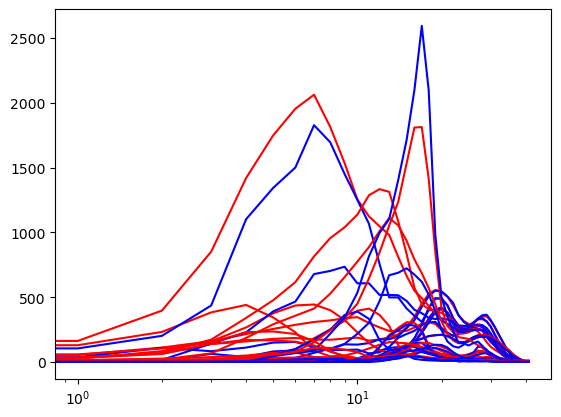

In [67]:
# Plot daily mean distribution
ii = np.arange(0, len(df_daily_2010_2020_mean), 1)

jj = np.arange(7,25,1)

fig, ax = plt.subplots()

for i in jj:
    df_tmp_mean = df_daily_2010_2020_mean.iloc[i, 3:-1].to_frame() # Omit last column with -1 as that is flags
    
    ax.plot(df_tmp_mean.index, df_tmp_mean.values,'r')
    ax.set_xscale('log')
    
    df_tmp_median = df_daily_2010_2020_median.iloc[i,3:-1].to_frame()
    ax.plot(df_tmp_median.index, df_tmp_median.values,'b')
    ax.set_xscale('log')
    
    

## Calculate the bin widths and $N_{tot}$ 

In [68]:
# Check to see that all intervals are equally spaced on a log scale
# np.diff(np.log10(diameters))

In [69]:
# Calculate the bin widths from geometric mean diameters and the total particle number concentration for each year

def calcNtot(diameters, df):
    # Create array to store upper bin boudaries
    upperBoundaries = np.empty(0)
    diameter_list = list(diameters)

    # Create array to store the number concentration in each bin
    dNs = np.empty(0)
    upperLimits = []

    for Dp in range(len(diameter_list)-1):

        # Calulate the upper bin from the geo mean of the midpoint diamters as they are equally spaced on a log scale
        upperLimits.append(np.sqrt( diameter_list[Dp] * diameter_list[Dp+1] ) )

    upperLimits = np.array(upperLimits)

    # Calulate the endpoints, ie the first lower limit and the last upper limit
    firstLimit = diameter_list[0]**2 / upperLimits[0] # This is actually the first lower limit, but its needed for the first binwidth
    lastLimit = diameter_list[-1]**2 / upperLimits[-1]

    upperBoundaries = np.insert(upperLimits, 0, firstLimit) 
    upperBoundaries = np.append(upperBoundaries, lastLimit)

    # Calculate dlogDp from the boundaries
    dlogDp = np.log10(upperBoundaries[1:]) - np.log10(upperBoundaries[:-1])

    # Calculate the particle concentration in each bin (dN) by multiplying dNdlogD with dlogD

    lenDiam = len(diameters)
    idx = len(GMDs)-lenDiam+3

    dNdlogDp = df.iloc[:,idx:-1]
    dNs = dNdlogDp*(dlogDp)
    ntotCalc = dNs.sum(axis=1)    

    df_ntotCalc = df.copy(deep = True)
    df_ntotCalc['NtotCalc'] = ntotCalc
    return df_ntotCalc

In [70]:
df_daily_2010_2020_median_ntotCalc = calcNtot(diameters, df_daily_2010_2020_median)
df_2010_2020_ntotCalc = calcNtot(diameters, df_2010_2020) # 30 min res
df_hourly_2010_2020_mean_ntotCalc = calcNtot(diameters, df_hourly_2010_2020_mean) # 30 min res

In [71]:
df_daily_2010_2020_median_ntotCalc.head(20)

,UFCPC,CPC3010,Ntot,5.012,5.623,6.31,7.079,7.943,8.913,10.0,...,316.228,354.813,398.107,446.684,501.187,562.341,630.957,707.946,flag,NtotCalc
DateTime,,,,,,,,,,,,,,,,,,,,,
2010-08-03,0.0,182.125050,208.743710,2.807274e-29,2.805087e-29,2.802623e-29,2.799847e-29,2.796717e-29,2.793188e-29,2.789083e-29,...,1.595947e+01,1.140810e+01,6.404960e+00,3.215610e+00,6.580380e-02,3.644812e-02,NaN,NaN,0.0,195.422265
2010-08-08,0.0,208.549030,216.002220,2.803765e-29,2.801642e-29,2.799177e-29,2.796336e-29,2.793333e-29,2.789739e-29,2.785956e-29,...,2.583533e-01,3.454788e-01,7.831442e-01,2.956088e-01,1.836670e-02,2.100116e-29,NaN,NaN,0.0,197.317230
2010-08-09,0.0,154.734860,161.003870,2.806636e-29,2.804662e-29,2.802281e-29,2.801081e-29,8.042767e-02,1.139879e+01,1.247090e+01,...,2.046894e+00,1.640962e+00,1.104209e+00,6.720334e-01,3.448541e-01,3.823051e-01,NaN,NaN,0.0,129.073125
2010-08-10,0.0,134.719790,131.968835,2.810195e-29,2.808443e-29,2.512165e+00,1.344979e+00,9.600177e-01,3.076694e+01,4.277998e+01,...,1.163181e+00,2.004981e+00,1.831223e+00,1.312853e+00,6.538213e-01,8.970167e-01,NaN,NaN,0.0,109.282715
2010-08-11,0.0,238.900390,235.042670,2.816689e-29,2.814186e-29,2.812867e-29,2.813508e-29,1.201330e+00,4.388591e+01,7.954211e+01,...,2.129925e+00,2.208846e+00,1.974385e+00,1.572773e+00,1.200883e+00,9.980769e-01,NaN,NaN,0.0,209.785219
2010-08-12,0.0,217.511540,210.367135,2.809073e-29,2.811712e-29,2.809459e-29,2.810912e-29,2.988597e-01,2.759165e+01,3.907844e+01,...,3.029406e+00,2.734418e+00,2.293894e+00,1.758534e+00,1.196882e+00,1.270764e+00,NaN,NaN,0.0,178.575169
2010-08-13,0.0,345.619480,365.804310,2.804068e-29,2.803278e-29,2.806286e-29,9.656931e-01,2.395757e-01,2.280036e+01,3.302152e+01,...,2.013338e+00,2.162721e+00,1.652657e+00,1.387767e+00,7.904804e-01,1.037931e+00,NaN,NaN,0.0,347.025333
2010-08-17,0.0,73.230619,90.965196,2.798339e-29,2.796429e-29,2.793905e-29,2.791786e-29,2.792821e-29,2.788836e-29,9.372879e-01,...,2.347158e-29,2.291268e-29,2.239401e-29,2.190885e-29,2.146085e-29,2.103895e-29,NaN,NaN,0.0,44.688033
2010-08-18,0.0,253.924260,274.264120,2.818039e-29,3.566908e+01,1.086134e+02,8.241685e+01,1.104258e+02,1.488785e+02,1.534663e+02,...,2.435447e+01,1.159827e+01,6.361371e+00,3.276498e+00,1.181661e+00,8.864701e-01,NaN,NaN,0.0,288.351084


In [72]:
cols = df_daily_2010_2020_median.columns[3:-1]

In [73]:
diameter_list = list(diameters) 
df_daily_2010_2020_median[cols]

,5.012,5.623,6.31,7.079,7.943,8.913,10.0,11.22,12.589,14.125,...,251.189,281.838,316.228,354.813,398.107,446.684,501.187,562.341,630.957,707.946
DateTime,,,,,,,,,,,,,,,,,,,,,
2010-08-03,2.807274e-29,2.805087e-29,2.802623e-29,2.799847e-29,2.796717e-29,2.793188e-29,2.789083e-29,2.784506e-29,2.779898e-29,2.528172,...,36.805352,25.441111,15.959473,11.408104,6.404960,3.215610,6.580380e-02,3.644812e-02,NaN,NaN
2010-08-08,2.803765e-29,2.801642e-29,2.799177e-29,2.796336e-29,2.793333e-29,2.789739e-29,2.785956e-29,2.781377e-29,1.980118e+01,95.843733,...,1.347548,0.582094,0.258353,0.345479,0.783144,0.295609,1.836670e-02,2.100116e-29,NaN,NaN
2010-08-09,2.806636e-29,2.804662e-29,2.802281e-29,2.801081e-29,8.042767e-02,1.139879e+01,1.247090e+01,2.386696e+01,5.317039e+01,44.253335,...,6.824198,4.120078,2.046894,1.640962,1.104209,0.672033,3.448541e-01,3.823051e-01,NaN,NaN
2010-08-10,2.810195e-29,2.808443e-29,2.512165e+00,1.344979e+00,9.600177e-01,3.076694e+01,4.277998e+01,6.963213e+01,1.180271e+02,115.314160,...,2.201041,1.821533,1.163181,2.004981,1.831223,1.312853,6.538213e-01,8.970167e-01,NaN,NaN
2010-08-11,2.816689e-29,2.814186e-29,2.812867e-29,2.813508e-29,1.201330e+00,4.388591e+01,7.954211e+01,1.319526e+02,2.299151e+02,359.763670,...,3.949737,3.182375,2.129925,2.208846,1.974385,1.572773,1.200883e+00,9.980769e-01,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,4.856011e-29,4.852284e-29,4.849348e-29,4.847406e-29,4.842079e-29,1.124949e-01,4.242500e+00,4.548924e+00,6.194749e+00,7.793845,...,13.867514,12.961275,10.035624,7.545087,4.860186,6.319750,5.246771e+00,4.236436e+00,5.858947e-01,1.829243e+00
2020-12-28,NaN,4.883492e-29,4.898032e-29,4.886053e-29,4.880367e-29,4.892914e-29,2.828007e+00,4.719816e+00,8.951490e+00,12.309525,...,48.724140,30.998753,26.608241,20.886540,11.484529,7.620646,6.249617e+00,5.127825e+00,2.445025e+00,1.705581e+00
2020-12-29,NaN,4.924687e-29,4.921681e-29,4.920744e-29,4.915452e-29,3.734622e-01,2.861616e+00,4.430043e+00,8.259293e+00,11.333296,...,18.791206,13.295481,8.799040,5.236407,0.004128,0.425705,1.802560e-29,1.766702e-29,1.734943e-29,1.705079e-29


In [74]:
# Check that boundries are correct

# ys = [0,10]

# fig, ax = plt.subplots()
# for i in range(len(diameters)):
#     ls = [diameters[i], diameters[i]]
#     ax.plot(ls,ys,'r:')
#     ax.set_xscale('log')
    
# for i in range(len(upperBoundaries)):
#     ls2 = [upperBoundaries[i],upperBoundaries[i]]
#     ax.plot(ls2,ys,'b')
    


In [75]:
# ls = [diameters[i], diameters[i]]
# print(ls)

### N_tot from CPC vs calclated N_tot

R-squared: 0.999363


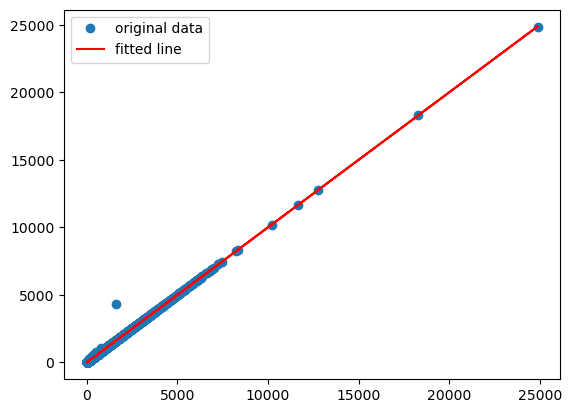

0.0445901316076629
1.0004705430431775


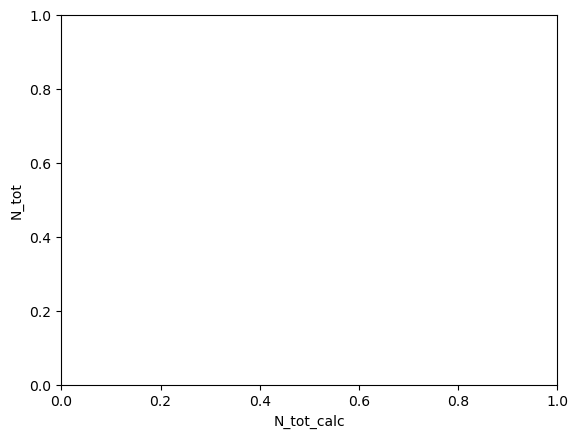

In [76]:
varx = df_hourly_2010_2020_mean_ntotCalc['NtotCalc'].values
vary = df_hourly_2010_2020_mean_ntotCalc['Ntot'].values

mask = ~np.isnan(varx) & ~np.isnan(vary)
res = sc.stats.linregress(varx[mask], vary[mask])

print(f"R-squared: {res.rvalue**2:.6f}")

plt.plot(varx,
         vary,
         'o', label='original data')
plt.plot(varx,
         res.intercept + res.slope*varx,
         'r-', label='fitted line')
plt.legend()
plt.show()    
plt.ylabel('N_tot')
plt.xlabel('N_tot_calc')
print(res.intercept)
print(res.slope)

### Compare $N_{D_P <x}/N_{tot}$ and UFCPC/CPC

In [77]:
# Compare the area up to x nm with total area 
# Vary the threshold diameter x

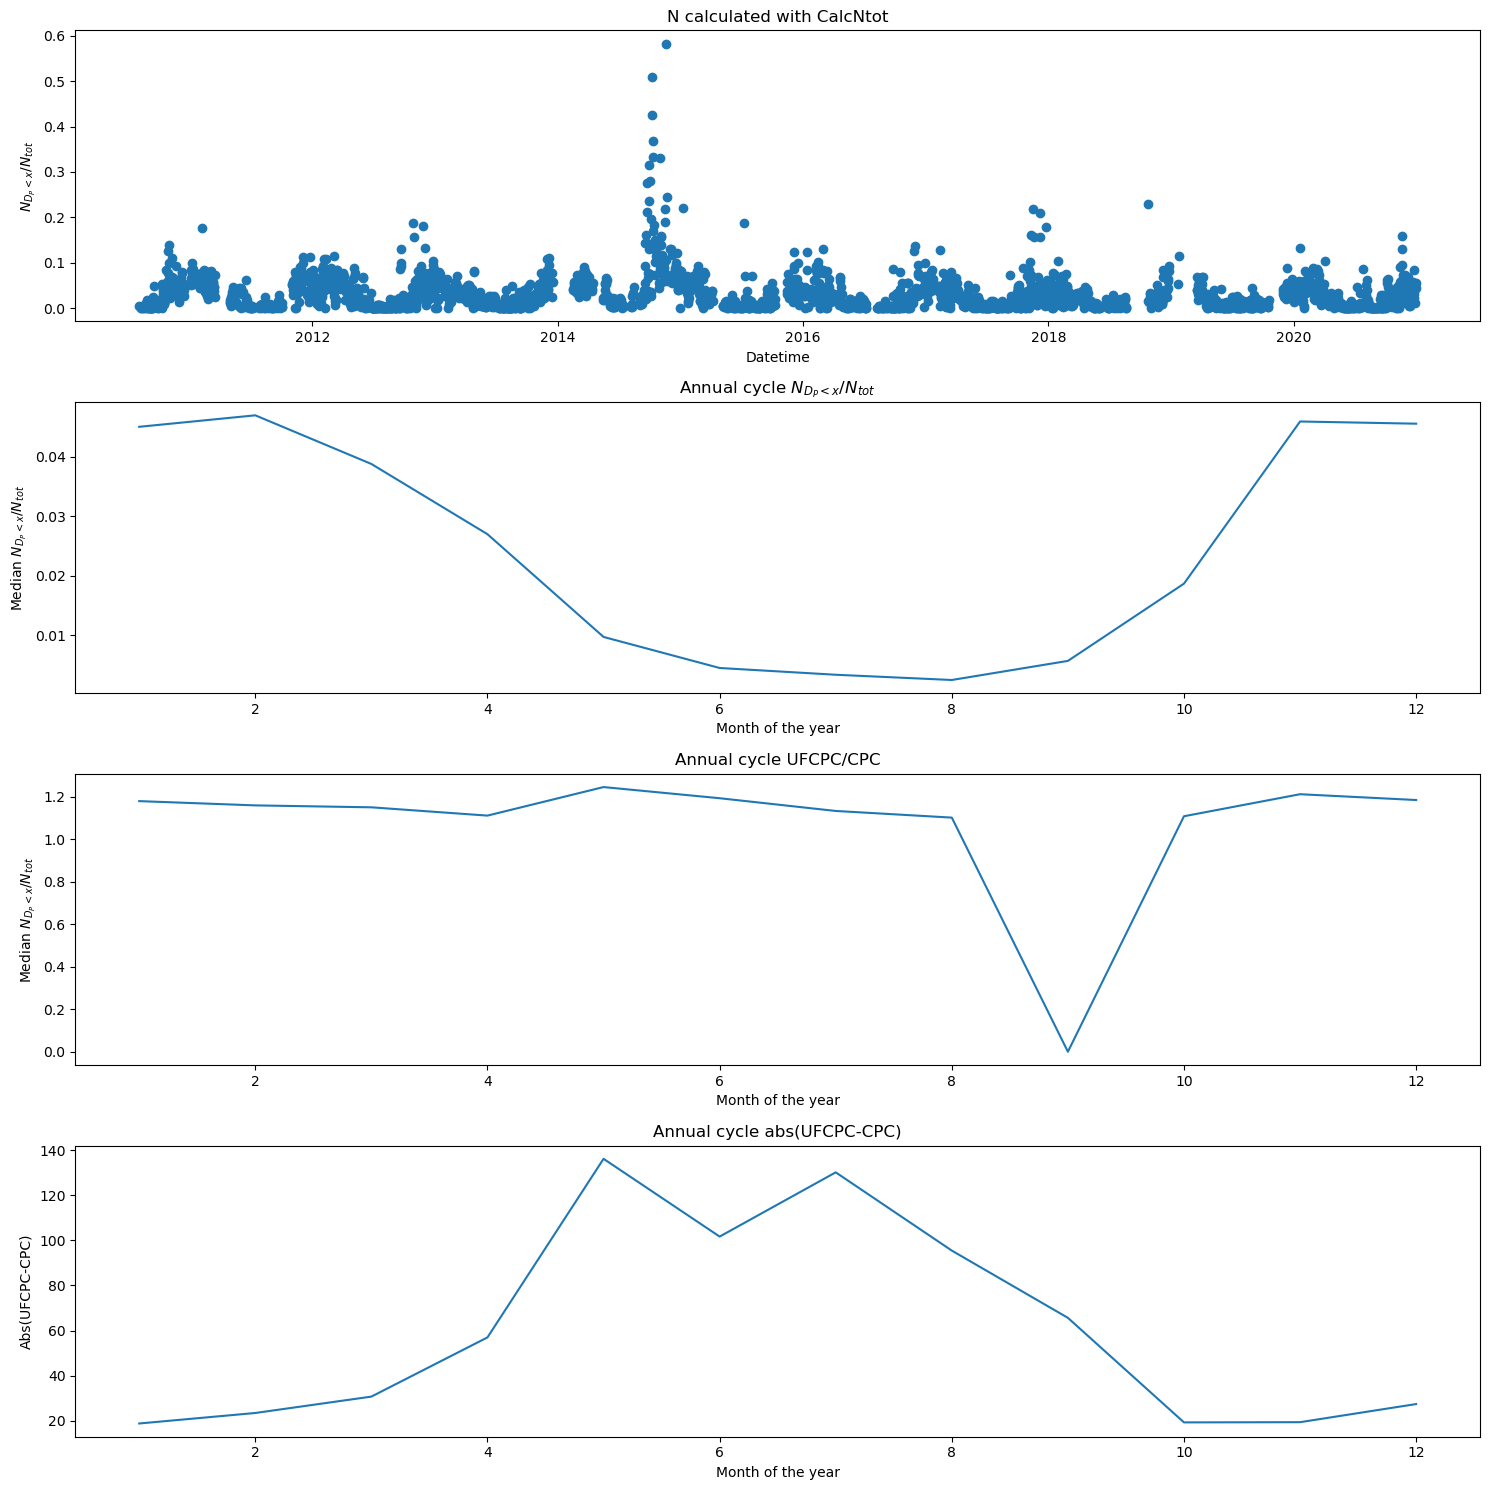

In [78]:
threshold = 10

bin_cols = get_bins(bin_col_names_2010_2020)
#print(bin_cols)
bin_cols = [float(x) for x in bin_cols]
bin_cols = [x for x in bin_cols if x < threshold]
#print(bin_cols)

# df changes
df_daily_2010_2020_median_copy = df_daily_2010_2020_median.copy(deep = True)
df_tmp = calcNtot(diameters[:len(bin_cols)+1], df_daily_2010_2020_median_copy)

# Plot Nx/Ntot
NxNtot = df_tmp['NtotCalc'].values/df_tmp['Ntot'].values

fig, axs = plt.subplots(4,figsize=(15, 15))

axs[0].plot(df_tmp.index,NxNtot,'o')
axs[0].set_xlabel('Datetime')
axs[0].set_ylabel('$N_{D_P < x}/N_{tot}$')
axs[0].set_title('N calculated with CalcNtot')

df_tmp['NxNtot'] = df_tmp['NtotCalc']/df_tmp['Ntot']
df_annual_cycle = df_tmp['NxNtot'].groupby(df_tmp.index.month).median()

axs[1].plot(df_annual_cycle.index, df_annual_cycle.values)
axs[1].set_xlabel('Month of the year')
axs[1].set_ylabel('Median $N_{D_P < x}/N_{tot}$')
axs[1].set_title('Annual cycle $N_{D_P < x}/N_{tot}$ ')

df_tmp['ratio_CPCs'] = df_tmp['UFCPC']/df_tmp['CPC3010']
df_annual_cycle_CPC = df_tmp['ratio_CPCs'].groupby(df_tmp.index.month).median()

axs[2].plot(df_annual_cycle_CPC.index, df_annual_cycle_CPC.values)
axs[2].set_xlabel('Month of the year')
axs[2].set_ylabel('Median $N_{D_P < x}/N_{tot}$')
axs[2].set_title('Annual cycle UFCPC/CPC')

# Diffs are so small so ratio is bad, abs diff is better
absDiffCPCs = np.absolute(df_tmp['UFCPC'].values - df_tmp['CPC3010'].values)
df_tmp['AbsDiffCPCs'] = absDiffCPCs
df_annual_cycle_abs = df_tmp['AbsDiffCPCs'].groupby(df_tmp.index.month).median()

axs[3].plot(df_annual_cycle_abs.index, df_annual_cycle_abs.values)
axs[3].set_xlabel('Month of the year')
axs[3].set_ylabel('Abs(UFCPC-CPC)')
axs[3].set_title('Annual cycle abs(UFCPC-CPC)')

plt.tight_layout()

### Plot daily comparison of $N_{D_P <x}/N_{tot}$ and UFCPC/CPC

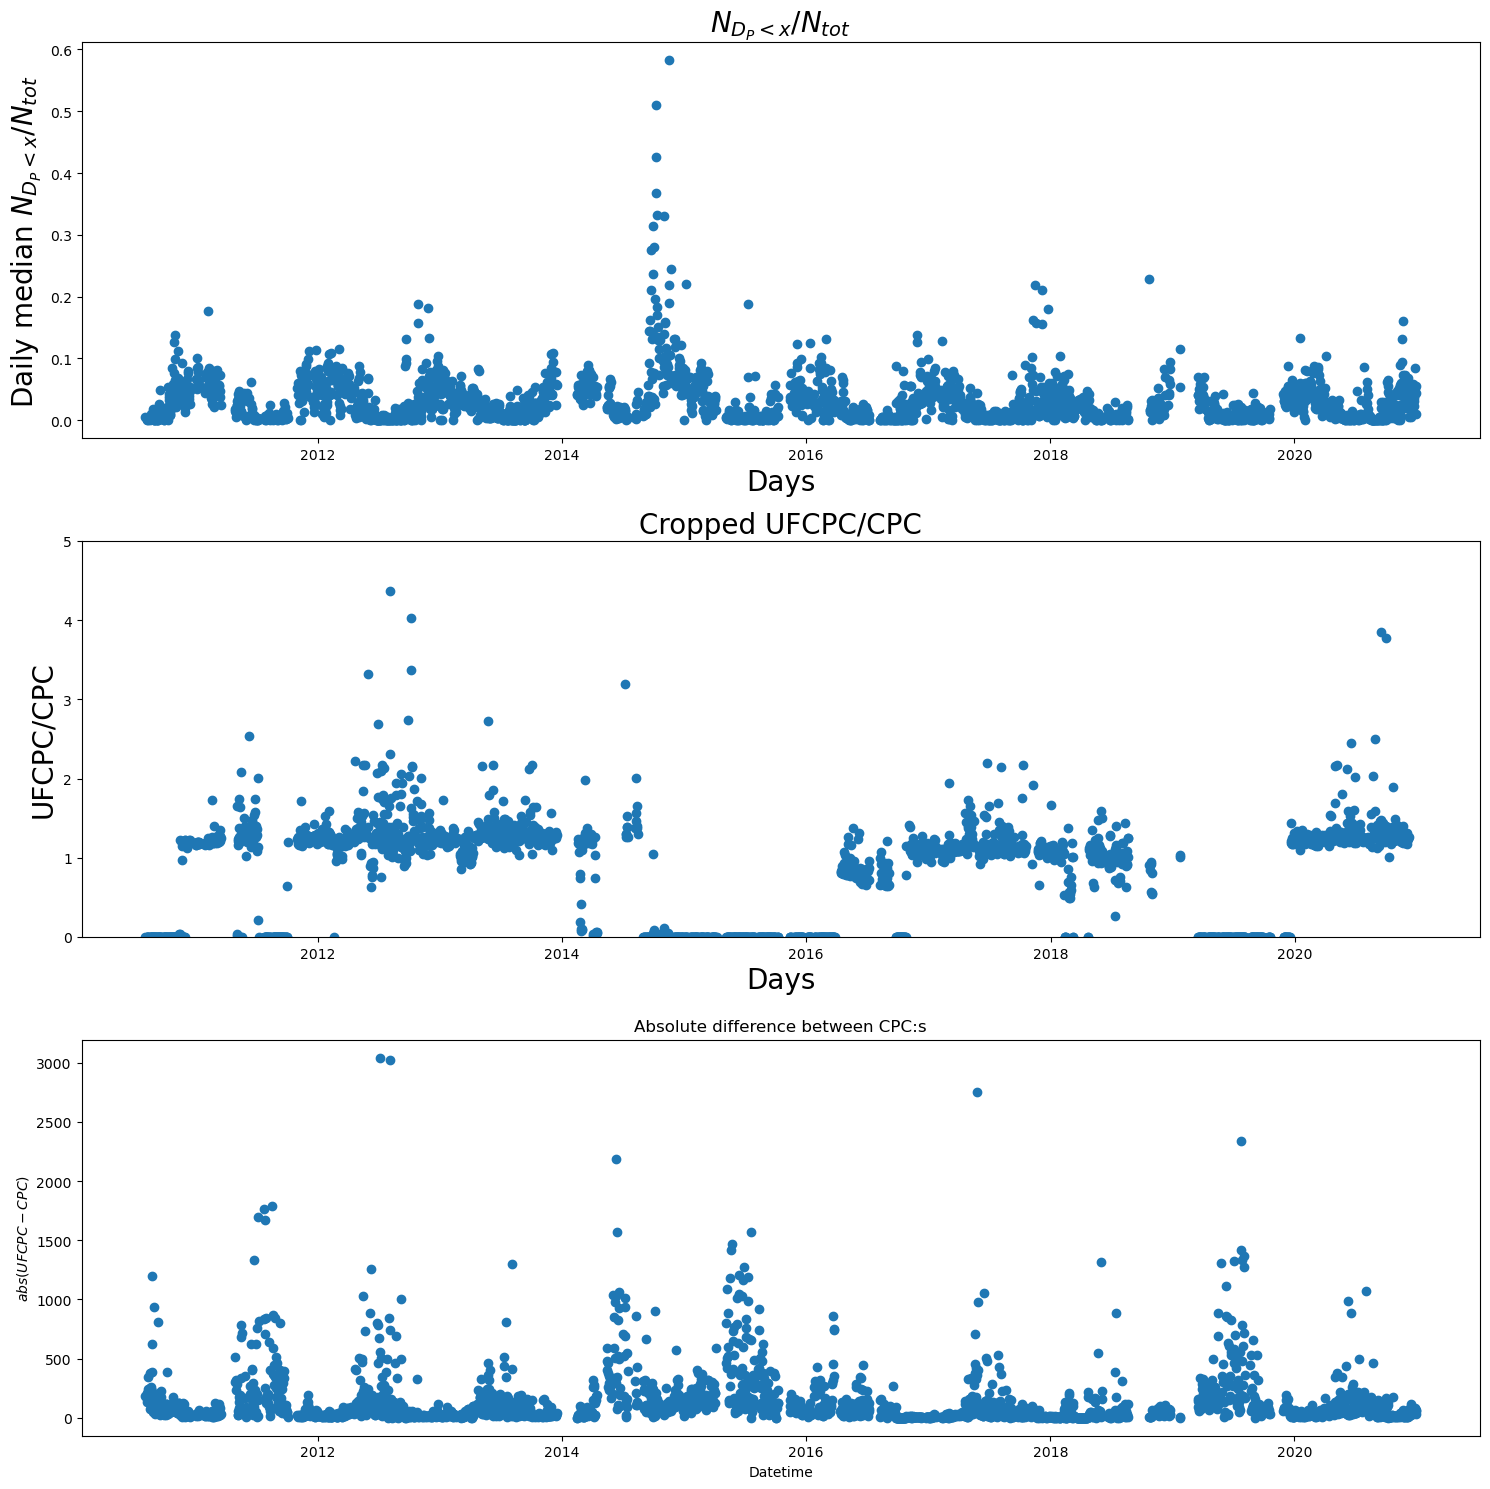

In [79]:
# Plot Nx/Ntot

fig, axs = plt.subplots(3, figsize=(15, 15))

axs[0].plot(df_tmp.index,df_tmp['NxNtot'].values,'o')
axs[0].set_xlabel('Days',fontsize=20)
axs[0].set_ylabel('Daily median $N_{D_P < x}/N_{tot}$',fontsize=20)
axs[0].set_title('$N_{D_P < x}/N_{tot}$',fontsize=20)

df_tmp['ratio_CPCs'] = df_tmp['UFCPC']/df_tmp['CPC3010']
df_annual_cycle_CPC = df_tmp['ratio_CPCs'].groupby(df_tmp.index.month).median()

axs[1].plot(df_tmp.index, df_tmp['ratio_CPCs'].values,'o')
axs[1].set_xlabel('Days',fontsize=20)
axs[1].set_ylabel('UFCPC/CPC',fontsize=20)
axs[1].set_title('Cropped UFCPC/CPC',fontsize=20)
axs[1].set_ylim([0, 5])

axs[2].plot(df_tmp.index,absDiffCPCs,'o')
axs[2].set_xlabel('Datetime')
axs[2].set_ylabel('$abs(UF CPC - CPC)$')
axs[2].set_title('Absolute difference between CPC:s')


plt.tight_layout()

## Clustering 

In [80]:
from sklearn import metrics
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.cluster import KMeans

#### Function to normalize the size distributions before clustering

In [81]:
def create_normalised_df(dataFrame, start_size_bin_col='5.012', end_size_bin_col='707.946'):
    df = dataFrame.copy()
    
    n_vars = ['norm'+str(df.loc[:, start_size_bin_col:end_size_bin_col].columns.tolist()[i]) for i in range(0, df.loc[:, start_size_bin_col:end_size_bin_col].shape[1])]
    print(n_vars)
    #divide by maximum
    df[n_vars] = df.loc[:, start_size_bin_col:end_size_bin_col].div(df.loc[:, start_size_bin_col:end_size_bin_col].max(axis=1), axis=0)
    
    df = df.loc[df.loc[:,start_size_bin_col:end_size_bin_col].dropna().index]
    
    Datetime_index = df.index    
    df.reset_index(drop=True, inplace=True)
    #print("Size of df after removing np.nan: "+str(len(df)))
    
    start_size_normbin_col = 'norm'+str(start_size_bin_col)
    end_size_normbin_col = 'norm'+str(end_size_bin_col)    
    
    df_norm = df.loc[:, start_size_normbin_col:end_size_normbin_col].copy()
    df_norm.index = Datetime_index
    df.index = Datetime_index
    
    print("Shape of df_norm: "+str(df_norm.shape))
    print("Shape of df: "+str(df.shape))
    return df, df_norm

#### Function to perform clustering of normalized size distributions

In [216]:
def perform_clustering(df_normarlised, n_clusters):
    kmeans = KMeans(init="k-means++", n_clusters=n_clusters).fit(df_normarlised) #Compute k-means clustering.
    labels = kmeans.labels_
    centres = kmeans.cluster_centers_
    df_normarlised['clusters'] = kmeans.predict(df_normarlised) #Predict the closest cluster each sample in X belongs to.
    df_normalized_copy = df_normarlised.copy()
    print(df_normalized_copy['clusters'].unique())
    df_normalized_copy['clusters'] = df_normalized_copy['clusters']+1
    print(df_normalized_copy['clusters'].unique())
    return df_normalized_copy

In [217]:
# Calling function to normalize size distributions 

df1, df_daily_2010_2020_median_norm = create_normalised_df(df_daily_2010_2020_median)
df2, df_daily_2010_2020_mean_norm = create_normalised_df(df_daily_2010_2020_mean)
df3, df_daily_2010_2020_1h_mean_norm = create_normalised_df(df_hourly_2010_2020_mean)


['norm5.012', 'norm5.623', 'norm6.31', 'norm7.079', 'norm7.943', 'norm8.913', 'norm10.0', 'norm11.22', 'norm12.589', 'norm14.125', 'norm15.849', 'norm17.783', 'norm19.953', 'norm22.387', 'norm25.119', 'norm28.184', 'norm31.623', 'norm35.481', 'norm39.811', 'norm44.668', 'norm50.119', 'norm56.234', 'norm63.096', 'norm70.795', 'norm79.433', 'norm89.125', 'norm100.0', 'norm112.202', 'norm125.893', 'norm141.254', 'norm158.489', 'norm177.828', 'norm199.526', 'norm223.872', 'norm251.189', 'norm281.838', 'norm316.228', 'norm354.813', 'norm398.107', 'norm446.684', 'norm501.187', 'norm562.341', 'norm630.957', 'norm707.946']
Shape of df_norm: (1491, 44)
Shape of df: (1491, 92)
['norm5.012', 'norm5.623', 'norm6.31', 'norm7.079', 'norm7.943', 'norm8.913', 'norm10.0', 'norm11.22', 'norm12.589', 'norm14.125', 'norm15.849', 'norm17.783', 'norm19.953', 'norm22.387', 'norm25.119', 'norm28.184', 'norm31.623', 'norm35.481', 'norm39.811', 'norm44.668', 'norm50.119', 'norm56.234', 'norm63.096', 'norm70.795

In [85]:
#df_hourly_2010_2020_mean.head()

#### Check that are normalized (only snapshots)

In [155]:
# jj = np.arange(7,25,1)

# fig, ax = plt.subplots()

# for i in jj:
#     df_tmp_norm = df_daily_2010_2020_median_norm.iloc[i,:].to_frame() # Omit last column with -1 as that is flags
    
#     ax.plot(diameters*10**9, df_tmp_norm.values,'r')
#     ax.set_xscale('log')


#### Cluster daily median and mean data and 1h hour mean

##### Define the number of clusters 

In [156]:
n_clusters = 5

In [229]:
df_norm_clustered_median = perform_clustering(df_daily_2010_2020_median_norm, n_clusters)
df_norm_clustered_mean = perform_clustering(df_daily_2010_2020_mean_norm, n_clusters)

# 1 hour data needs special treatment:
# Drop the 1st and two last bins before clustering
df_hourly_norm_dropped = df_daily_2010_2020_1h_mean_norm.copy()
df_hourly_norm_dropped = df_hourly_norm_dropped.drop \
                         (columns=['norm5.012','norm630.957','norm707.946'])

df_norm_clustered_1h_mean = perform_clustering(df_hourly_norm_dropped, n_clusters)
print(df_norm_clustered_1h_mean['clusters'].unique())

[1 4 2 0 3]
[2 5 3 1 4]
[3 1 2 4 0]
[4 2 3 5 1]
[0 2 4 3 1]
[1 3 5 4 2]
[1 3 5 4 2]


In [158]:
#df_hourly_norm_dropped

#### Cluster 1h-mean data (not normalized)

In [219]:
# First drop the columns that should not be clustered
df_hourly_2010_2020_mean_cleaned = df_hourly_2010_2020_mean.copy()
df_hourly_2010_2020_mean_cleaned = df_hourly_2010_2020_mean_cleaned.drop \
                                   (columns=['UFCPC','5.012','630.957','707.946','CPC3010','Ntot','flag'])

print(df_hourly_2010_2020_mean_cleaned.shape)

def countNans(df):
    no_of_rows, no_of_cols = df.shape
    list_of_nans = []
    for i in range(no_of_cols):
        tmp = df.iloc[:,i].values
        no_of_nans = tmp[np.isnan(tmp)]
        list_of_nans.append( len(no_of_nans) )
    return list_of_nans
        
list_of_nans = countNans(df_hourly_2010_2020_mean_cleaned)  
#print(list_of_nans)
# Conclusion: I drop the first size bin as it contains the majority of the nans
        
        

(60439, 41)


In [225]:
# To perform clustering of non-nromalized distributions NaNs must be dropped (done automatically in normalization)
print('Shape before dropping Nans:',df_hourly_2010_2020_mean_cleaned.shape)

df_hourly_2010_2020_mean_cleaned = df_hourly_2010_2020_mean_cleaned \
                                    .loc[df_hourly_2010_2020_mean_cleaned.loc[:,:].dropna().index]
print('Shape after dropping Nans:',df_hourly_2010_2020_mean_cleaned.shape)

df_clustered_1h_mean = perform_clustering(df_hourly_2010_2020_mean_cleaned, n_clusters)


Shape before dropping Nans: (60439, 42)
Shape after dropping Nans: (60439, 42)
[0 2 4 3 1]
[1 3 5 4 2]


#### Cluster 1h-mean data (normalized distributions)

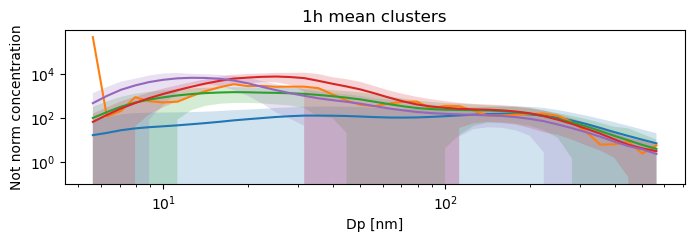

In [221]:
# Look at 1h mean clusters (from excluding the first bin)

# I have dropped two last columns + first (bins that is)
df_mean_1h_clusters = df_clustered_1h_mean.groupby('clusters').mean()
df_std_1h_clusters  = df_clustered_1h_mean.groupby('clusters').std()

fig, ax = plt.subplots(figsize=(8,2))

for i in range(n_clusters):
    ax.plot(diameters[1:-2]*10**9, df_mean_1h_clusters.iloc[i,:].values, '-')
    
    ax.fill_between(diameters[1:-2]*10**9, df_mean_1h_clusters.iloc[i,:].values+df_std_1h_clusters.iloc[i,:].values,                    
                        df_mean_1h_clusters.iloc[i,:].values-df_std_1h_clusters.iloc[i,:].values, alpha=0.2)
    
    #ax.plot(diameters*10**9, df_median_clusters.iloc[i,:].values, 'k-')
    #ax.set_xticks(bin_cols[::5])
    ax.set_xscale('log')
    ax.set_yscale('log')
    #ax.set_ylim(0,1.1)
plt.xlabel('Dp [nm]')
plt.title('1h mean clusters')
plt.ylabel('Not norm concentration')
plt.show()

In [162]:
df_mean_1h_clusters.head()

,5.623,6.31,7.079,7.943,8.913,10.0,11.22,12.589,14.125,15.849,...,199.526,223.872,251.189,281.838,316.228,354.813,398.107,446.684,501.187,562.341
clusters,,,,,,,,,,,,,,,,,,,,,
0,98.493626,182.071200,320.648838,493.512626,672.786648,853.415374,1038.467110,1201.940047,1326.852462,1414.716793,...,154.155569,121.018474,88.086316,61.720587,41.002270,25.267820,15.228469,9.456728,5.872063,3.859162
1,16.276309,20.576287,27.276199,32.914892,37.455737,41.155167,45.442932,51.030606,57.529012,65.805908,...,143.259778,126.894190,101.078690,75.293486,52.857771,34.911223,22.505260,14.963042,10.113037,6.882993
2,464628.720742,113.782961,205.915515,862.264425,570.142975,499.828810,539.213690,968.447780,1635.557250,2440.375550,...,149.240235,155.404095,122.589910,63.504685,23.509003,6.086729,6.240429,8.109983,2.354116,5.620107
3,65.177289,135.031864,265.144643,466.462355,780.953204,1214.156240,1792.051504,2590.188174,3602.033413,4783.536262,...,161.625497,119.682391,82.578106,53.181002,32.219969,19.324801,10.621293,5.994955,4.054997,3.026656
4,462.004431,987.264712,1881.610598,2955.808487,4213.905785,5349.269123,6221.548461,6583.895865,6473.980989,5919.097921,...,89.947506,70.280095,49.637018,33.973184,22.172705,13.996756,8.259617,5.214298,3.670733,2.266226


In [222]:
len(diameters[1:-2]*10**9)
print(df_mean_1h_clusters.shape)

(5, 41)


In [223]:
df_hourly_2010_2020_mean.iloc[:,1].values

array([1.92743870e+02, 1.82486285e+02, 1.41769720e+02, ...,
       2.47061390e-04, 1.23564450e-04, 2.46948720e-04])

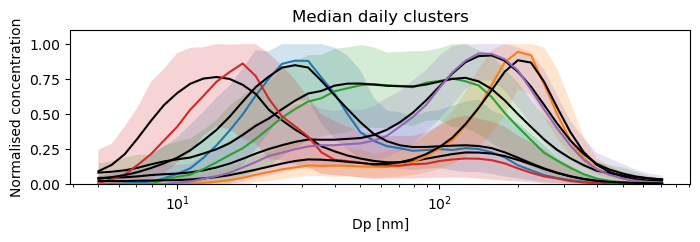

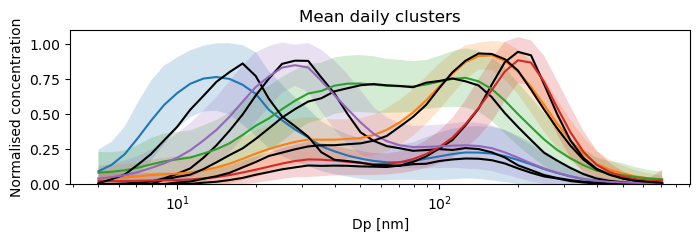

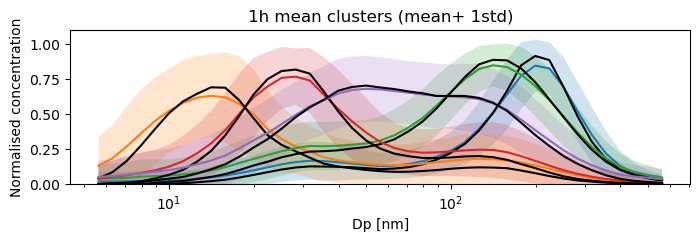

1
2
3
4
5


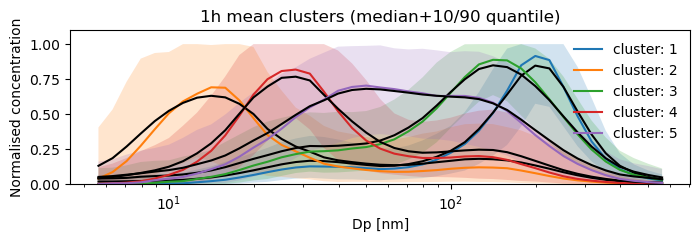

In [244]:
# Check to see how median clusters look like---------------------------------------


df_median_clusters = df_norm_clustered_median.groupby('clusters').median()
df_quantile10_clusters = df_norm_clustered_median.groupby('clusters').quantile(.1)
df_quantile90_clusters = df_norm_clustered_median.groupby('clusters').quantile(.9)

df_mean_clusters = df_norm_clustered_mean.groupby('clusters').mean()
df_std_clusters = df_norm_clustered_mean.groupby('clusters').std()



fig, ax = plt.subplots(figsize=(8,2))

for i in range(n_clusters):
    ax.plot(diameters*10**9, df_median_clusters.iloc[i,:].values, '-')
    ax.plot(diameters*10**9, df_mean_clusters.iloc[i,:].values, 'k-')
    ax.fill_between(diameters*10**9, df_quantile90_clusters.iloc[i,:].values,
                        df_quantile10_clusters.iloc[i,:].values, alpha=0.2)
    #ax.set_xticks(bin_cols[::5])
    ax.set_xscale('log')
    ax.set_ylim(0,1.1)
plt.xlabel('Dp [nm]')
plt.title('Median daily clusters')
plt.ylabel('Normalised concentration')
plt.show()

# Check to see how mean daily clusters look like---------------------------------------


fig, ax = plt.subplots(figsize=(8,2))

for i in range(n_clusters):
    ax.plot(diameters*10**9, df_mean_clusters.iloc[i,:].values, '-')
    ax.fill_between(diameters*10**9, df_mean_clusters.iloc[i,:].values+df_std_clusters.iloc[i,:].values,                    
                        df_mean_clusters.iloc[i,:].values-df_std_clusters.iloc[i,:].values, alpha=0.2)
    ax.plot(diameters*10**9, df_median_clusters.iloc[i,:].values, 'k-')
    #ax.set_xticks(bin_cols[::5])
    ax.set_xscale('log')
    ax.set_ylim(0,1.1)
    
    
plt.xlabel('Dp [nm]')
plt.title('Mean daily clusters')
plt.ylabel('Normalised concentration')
plt.show()

# Check to see how 1h mean clusters look like---------------------------------------
# !!! Note that columns have been dropped !!!! -------------------------------------


df_norm_clustered_1h_mean_mean = df_norm_clustered_1h_mean.groupby('clusters').mean()
df_norm_clustered_1h_std = df_norm_clustered_1h_mean.groupby('clusters').std()

fig, ax = plt.subplots(figsize=(8,2))

for i in range(n_clusters):
    ax.plot(diameters[1:-2]*10**9, df_norm_clustered_1h_mean_mean.iloc[i,:].values, '-')
    ax.fill_between(diameters[1:-2]*10**9, 
                    df_norm_clustered_1h_mean_mean.iloc[i,:].values + df_norm_clustered_1h_std.iloc[i,:].values,                    
                    df_norm_clustered_1h_mean_mean.iloc[i,:].values - df_norm_clustered_1h_std.iloc[i,:].values, alpha=0.2)
    
    # Plot the median to see similarity
    ax.plot(diameters[1:-2]*10**9, df_norm_clustered_1h_mean_median.iloc[i,:].values, 'k-')
    #ax.set_xticks(bin_cols[::5])
    ax.set_xscale('log')
    ax.set_ylim(0,1.1)
    
    
plt.xlabel('Dp [nm]')
plt.title('1h mean clusters (mean+ 1std)')
plt.ylabel('Normalised concentration')
plt.show()

# Median 1h mean clusters----------------------------------------------

df_norm_clustered_1h_mean_median = df_norm_clustered_1h_mean.groupby('clusters').median()
df_norm_clustered_1h_10q = df_norm_clustered_1h_mean.groupby('clusters').quantile(.1)
df_norm_clustered_1h_90q = df_norm_clustered_1h_mean.groupby('clusters').quantile(.9)


fig, ax = plt.subplots(figsize=(8,2))

clusters = [1,2,3,4,5]

for cluster in clusters:
    print(cluster)
    df_cluster = df_norm_clustered_1h_mean_median[df_norm_clustered_1h_mean_median.index == cluster]
    df_cluster_mean = df_norm_clustered_1h_mean_mean[df_norm_clustered_1h_mean_mean.index == cluster]
    df_cluster90 = df_norm_clustered_1h_90q[df_norm_clustered_1h_90q.index == cluster]
    df_cluster10 = df_norm_clustered_1h_10q[df_norm_clustered_1h_10q.index == cluster]
    
    ax.plot(diameters[1:-2]*10**9, df_cluster.iloc[0,:].values, '-', 
            label='cluster: '+str(cluster))
    ax.fill_between(diameters[1:-2]*10**9, 
                    df_cluster90.iloc[0,:].values,
                    df_cluster10.iloc[0,:].values,
                    alpha=0.2)
    ax.legend(frameon=False)
    
    # Plot the mean to see similarity
    ax.plot(diameters[1:-2]*10**9, df_cluster_mean.iloc[0,:].values, 'k-')
    #ax.set_xticks(bin_cols[::5])
    ax.set_xscale('log')
    ax.set_ylim(0,1.1)
    
    
plt.xlabel('Dp [nm]')
plt.title('1h mean clusters (median+10/90 quantile)')
plt.ylabel('Normalised concentration')
plt.show()

In [241]:
df_cluster.iloc[0,:].values

array([2.61037107e-31, 2.91612454e-31, 3.57334147e-31, 5.03806101e-31,
       2.31559276e-07, 4.30191800e-03, 5.91261360e-03, 1.34100617e-02,
       2.12835886e-02, 3.12753188e-02, 4.71589416e-02, 6.55104960e-02,
       8.55301141e-02, 1.04297887e-01, 1.18940489e-01, 1.26786041e-01,
       1.25646645e-01, 1.23563919e-01, 1.20259619e-01, 1.13841245e-01,
       1.07143419e-01, 1.11028066e-01, 1.20937827e-01, 1.40754458e-01,
       1.74660441e-01, 2.23902194e-01, 2.86867572e-01, 3.81749811e-01,
       5.07638349e-01, 6.67138521e-01, 8.48826456e-01, 9.15453163e-01,
       8.85935206e-01, 6.94280159e-01, 4.85171812e-01, 3.04769847e-01,
       1.80875566e-01, 1.06381036e-01, 6.62873163e-02, 4.11469991e-02,
       2.54852346e-02])

In [236]:
df_norm_clustered_1h_90q

,norm5.623,norm6.31,norm7.079,norm7.943,norm8.913,norm10.0,norm11.22,norm12.589,norm14.125,norm15.849,...,norm199.526,norm223.872,norm251.189,norm281.838,norm316.228,norm354.813,norm398.107,norm446.684,norm501.187,norm562.341
clusters,,,,,,,,,,,,,,,,,,,,,
1,0.047069,0.046809,0.055056,0.062398,0.070085,0.072030,0.082250,0.104200,0.126162,0.159038,...,1.000000,1.000000,1.000000,0.838072,0.615265,0.381594,0.221162,0.140884,0.098277,0.068787
2,0.404840,0.532962,0.731862,0.896214,0.936696,0.943632,1.000000,1.000000,0.993598,1.000000,...,0.343247,0.293649,0.229986,0.173024,0.124047,0.083113,0.053408,0.035897,0.025965,0.018818
3,0.114148,0.117684,0.134180,0.158102,0.166483,0.169935,0.196820,0.215458,0.245304,0.300966,...,0.969046,0.894206,0.768055,0.610203,0.453663,0.333602,0.238504,0.185655,0.145925,0.111307
4,0.120437,0.146699,0.186519,0.235751,0.278034,0.329447,0.417147,0.510950,0.631881,0.768828,...,0.390155,0.321472,0.249416,0.184353,0.134479,0.094704,0.061134,0.043741,0.030457,0.024434
5,0.160849,0.176978,0.210715,0.239219,0.258131,0.281713,0.330582,0.387534,0.426552,0.497308,...,0.701196,0.604459,0.491209,0.383679,0.299970,0.235128,0.176719,0.148762,0.129316,0.106487


In [360]:
df_tmp.head()

,UFCPC,CPC3010,Ntot,5.012,5.623,6.31,7.079,7.943,8.913,10.0,...,446.684,501.187,562.341,630.957,707.946,flag,NtotCalc,NxNtot,ratio_CPCs,AbsDiffCPCs
DateTime,,,,,,,,,,,,,,,,,,,,,
2010-08-03,0.0,182.12505,208.743710,2.807274e-29,2.805087e-29,2.802623e-29,2.799847e-29,2.796717e-29,2.793188e-29,2.789083e-29,...,3.215610,0.065804,3.644812e-02,NaN,NaN,0.0,1.056546,0.005061,0.0,182.12505
2010-08-08,0.0,208.54903,216.002220,2.803765e-29,2.801642e-29,2.799177e-29,2.796336e-29,2.793333e-29,2.789739e-29,2.785956e-29,...,0.295609,0.018367,2.100116e-29,NaN,NaN,0.0,0.072130,0.000334,0.0,208.54903
2010-08-09,0.0,154.73486,161.003870,2.806636e-29,2.804662e-29,2.802281e-29,2.801081e-29,8.042767e-02,1.139879e+01,1.247090e+01,...,0.672033,0.344854,3.823051e-01,NaN,NaN,0.0,0.207218,0.001287,0.0,154.73486
2010-08-10,0.0,134.71979,131.968835,2.810195e-29,2.808443e-29,2.512165e+00,1.344979e+00,9.600177e-01,3.076694e+01,4.277998e+01,...,1.312853,0.653821,8.970167e-01,NaN,NaN,0.0,0.334995,0.002538,0.0,134.71979
2010-08-11,0.0,238.90039,235.042670,2.816689e-29,2.814186e-29,2.812867e-29,2.813508e-29,1.201330e+00,4.388591e+01,7.954211e+01,...,1.572773,1.200883,9.980769e-01,NaN,NaN,0.0,0.397748,0.001692,0.0,238.90039


### Look at trends in 1h mean data 

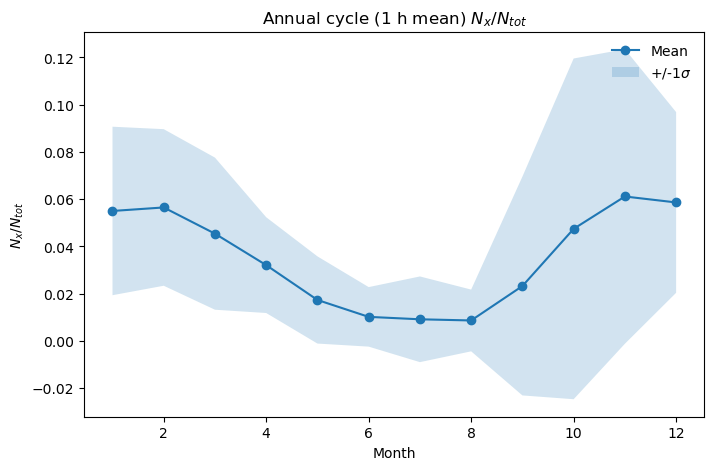

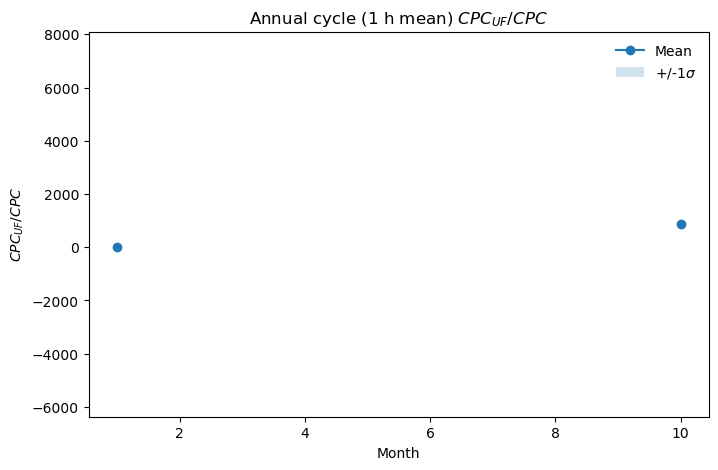

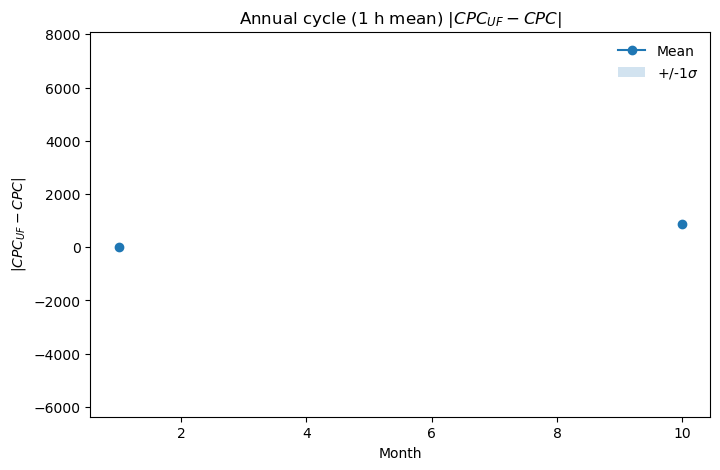

In [386]:
# Create temporary copy
df_tmp = df_hourly_2010_2020_mean.copy(deep = True)

# In temporary copy of mean data add columns: 

# Create Nx/Ntot for 1 h mean data
df_tmp = calcNtot(diameters[:len(bin_cols)+1], df_tmp)

df_tmp['NxNtot'] = df_tmp['NtotCalc']/df_tmp['Ntot']

# Look at annual cycle for NxNtot
df_1h_annual_cycle_mean = df_tmp['NxNtot'].groupby(df_tmp.index.month).mean()
df_1h_annual_cycle_std = df_tmp['NxNtot'].groupby(df_tmp.index.month).std()

df_1h_annual_cycle_median = df_tmp['NxNtot'].groupby(df_tmp.index.month).median()
df_1h_annual_cycle_10q = df_tmp['NxNtot'].groupby(df_tmp.index.month).quantile(0.1)
df_1h_annual_cycle_90q = df_tmp['NxNtot'].groupby(df_tmp.index.month).quantile(0.9)

# Create UF CPC/CPC ratio for 1 h mean data
df_tmp['ratio_CPCs'] = df_tmp['UFCPC']/df_tmp['CPC3010']

df_1h_annual_cycle_rat_mean = df_tmp['ratio_CPCs'].groupby(df_tmp.index.month).mean()
df_1h_annual_cycle_rat_std = df_tmp['ratio_CPCs'].groupby(df_tmp.index.month).std()

df_1h_annual_cycle_rat_median = df_tmp['ratio_CPCs'].groupby(df_tmp.index.month).median()
df_1h_annual_cycle_rat_10q = df_tmp['ratio_CPCs'].groupby(df_tmp.index.month).quantile(0.1)
df_1h_annual_cycle_rat_90q = df_tmp['ratio_CPCs'].groupby(df_tmp.index.month).quantile(0.9)

# Create absolute diff Uf cpc - cpc
df_tmp['abs_diff'] = df_tmp['UFCPC']/df_tmp['CPC3010']

df_1h_annual_cycle_diff_mean = df_tmp['abs_diff'].groupby(df_tmp.index.month).mean()
df_1h_annual_cycle_diff_std = df_tmp['abs_diff'].groupby(df_tmp.index.month).std()

df_1h_annual_cycle_diff_median = df_tmp['abs_diff'].groupby(df_tmp.index.month).median()
df_1h_annual_cycle_diff_10q = df_tmp['abs_diff'].groupby(df_tmp.index.month).quantile(0.1)
df_1h_annual_cycle_diff_90q = df_tmp['abs_diff'].groupby(df_tmp.index.month).quantile(0.9)

def makeTrendPlotsMean(dfMean, dfStd, xL, yL, tL):
    fig, axs = plt.subplots(1, figsize=(8, 5))
    axs.plot(dfMean.index, 
             dfMean.values,
             'o-', label= 'Mean')
    axs.fill_between(dfMean.index,
                dfMean.values + dfStd.values,
                dfMean.values - dfStd.values,
                alpha=0.2,label= '+/-1$\sigma$')
    axs.legend(frameon=False)
    axs.set_xlabel(xL)
    axs.set_ylabel(yL)
    axs.set_title(tL) 
    return fig
        
fig1 = makeTrendPlotsMean(df_1h_annual_cycle_mean,
                             df_1h_annual_cycle_std,
                            'Month','$N_x/N_{tot}$',
                            'Annual cycle (1 h mean) $N_x/N_{tot}$')

fig2 = makeTrendPlotsMean(df_1h_annual_cycle_rat_mean,
                             df_1h_annual_cycle_rat_std,
                            'Month','$CPC_{UF}/CPC$',
                            'Annual cycle (1 h mean) $CPC_{UF}/CPC$')

fig3 = makeTrendPlotsMean(df_1h_annual_cycle_diff_mean,
                             df_1h_annual_cycle_diff_std,
                            'Month','$|CPC_{UF}-CPC|$',
                            'Annual cycle (1 h mean) $|CPC_{UF}-CPC$|')

# print(df_hourly_2010_2020_mean_copy.shape)

# # Create abs(UF_CPC-CPC ) for 1 h mean data 
# df_hourly_2010_2020_mean_copy['absDiff'] = np.absolute( df_tmp['UFCPC']-df_tmp['CPC3010'])
# print(df_hourly_2010_2020_mean_copy.shape)

In [384]:
df_1h_annual_cycle_diff_mean

DateTime
1       1.025469
2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
7            NaN
8            NaN
9            NaN
10    864.282420
11           NaN
12           NaN
Name: abs_diff, dtype: float64

,UFCPC,CPC3010,Ntot,5.012,5.623,6.31,7.079,7.943,8.913,10.0,...,446.684,501.187,562.341,630.957,707.946,flag,NtotCalc,NxNtot,ratio_CPCs,abs_diff
DateTime,,,,,,,,,,,,,,,,,,,,,
2010-08-03 00:00:00,0.0,192.743870,243.841220,2.808560e-29,2.806373e-29,2.803910e-29,2.801134e-29,2.798005e-29,2.794476e-29,2.790497e-29,...,2.245721,0.025513,2.092485e-29,NaN,NaN,0.0,1.977723,0.008111,0.0,0.0
2010-08-03 01:00:00,0.0,182.486285,208.743710,2.807999e-29,2.805812e-29,2.803348e-29,2.800572e-29,2.797443e-29,2.793914e-29,2.789934e-29,...,2.259782,1.784399,1.099211e+00,NaN,NaN,0.0,1.132900,0.005427,0.0,0.0
2010-08-03 02:00:00,0.0,141.769720,166.306785,2.806518e-29,2.804331e-29,2.801867e-29,2.799090e-29,2.795960e-29,2.792430e-29,2.788325e-29,...,4.104476,0.682179,4.430441e-01,NaN,NaN,0.0,0.565910,0.003403,0.0,0.0
2010-08-03 03:00:00,0.0,214.613150,241.289260,2.805184e-29,2.802996e-29,2.800531e-29,2.797754e-29,2.794624e-29,2.791094e-29,2.787113e-29,...,4.945069,0.071439,2.089488e-29,NaN,NaN,0.0,1.685266,0.006984,0.0,0.0
2010-08-08 19:00:00,0.0,172.534855,202.129580,2.803895e-29,2.801706e-29,2.799242e-29,2.796464e-29,2.793333e-29,2.789803e-29,2.785696e-29,...,0.922629,0.018367,2.088351e-29,NaN,NaN,0.0,0.103481,0.000512,0.0,0.0


(60439, 48)
(60439, 49)
(60439, 50)


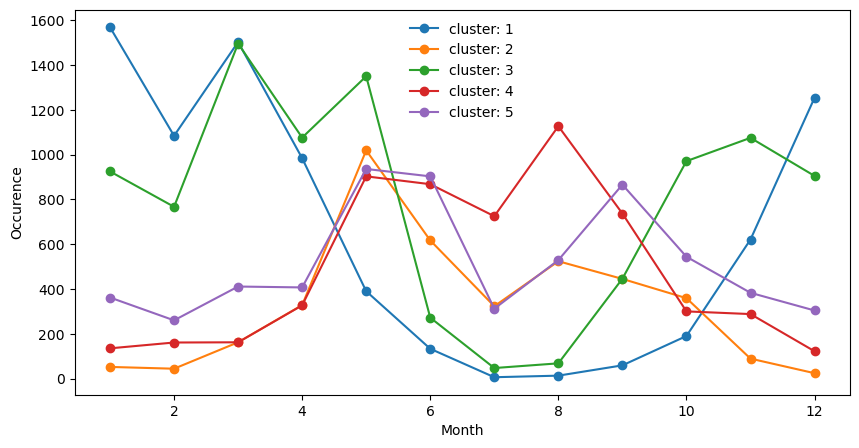

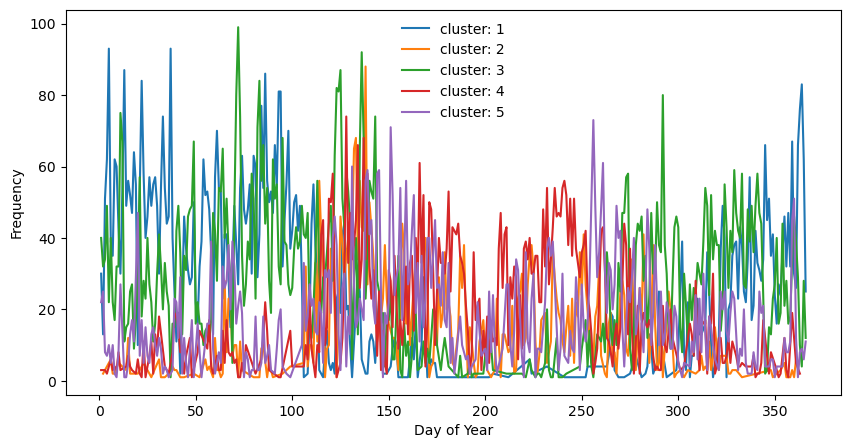

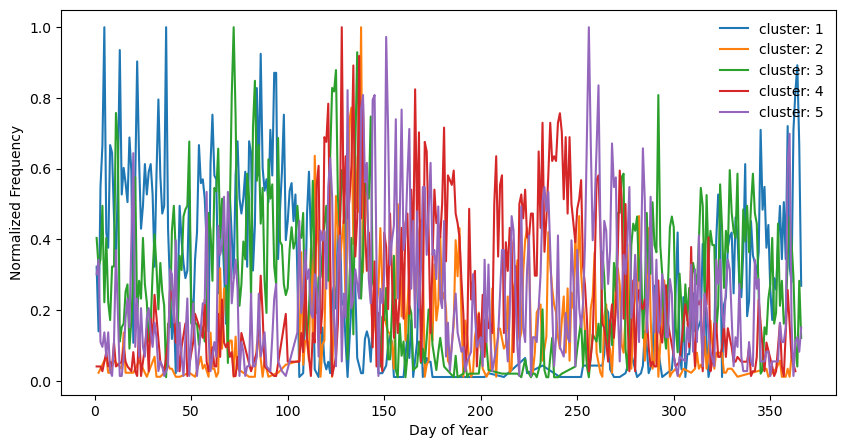

In [318]:
# Create a temporary copy of cluster-assigned data (normalized)
df_norm_clustered_1h_mean_copy = df_norm_clustered_1h_mean.copy()

clusters = [1, 2, 3, 4, 5]

fig, ax = plt.subplots(figsize=(10,5))

for cluster in clusters:
    df_cluster = df_norm_clustered_1h_mean_copy[df_norm_clustered_1h_mean_copy['clusters'] == cluster]
    df_cluster = df_cluster.copy()
    
    # Create a cloumn called month in dataframe
    df_cluster.loc[:,'month'] =  df_cluster.index.month
    
    # Calculate the occurence of cluster "cluster" per month
    df_cluster_count = df_cluster.groupby('month').count()
    
    ax.plot(df_cluster_count.index, df_cluster_count.iloc[:,0], 'o-', label='cluster: '+str(cluster))
    ax.set_xlabel('Month')
    ax.set_ylabel('Occurence')
    ax.legend(frameon=False)

fig, ax = plt.subplots(figsize=(10,5))

for cluster in clusters:
    df_cluster = df_norm_clustered_1h_mean_copy[df_norm_clustered_1h_mean_copy['clusters'] == cluster]
    df_cluster = df_cluster.copy()
    
    # Create a column called day of year (DoY) which gives the day of the year 1 to 366
    df_cluster.loc[:,'DoY'] = df_cluster.index.dayofyear
    
    # Calculate the occurence of cluster "cluster" per month
    df_cluster_count = df_cluster.groupby('DoY').count()
    
    # Plot the occurence of cluster X vs the day of year
    ax.plot(df_cluster_count.index, df_cluster_count.iloc[:,0], '-', label='cluster: '+str(cluster))
    ax.set_xlabel('Day of Year')
    ax.set_ylabel('Frequency')
    ax.legend(frameon=False) 
    
fig, ax = plt.subplots(figsize=(10,5))

for cluster in clusters:
    df_cluster = df_norm_clustered_1h_mean_copy[df_norm_clustered_1h_mean_copy['clusters'] == cluster]
    df_cluster = df_cluster.copy()
    
    # Create a column called day of year (DoY) which gives the day of the year 1 to 366
    df_cluster.loc[:,'DoY'] = df_cluster.index.dayofyear
    
    # Calculate the occurence of cluster "cluster" per month
    df_cluster_count = df_cluster.groupby('DoY').count()
    
    # Plot the occurence of cluster X vs the day of year
    ax.plot(df_cluster_count.index,
            df_cluster_count.iloc[:,0]/df_cluster_count.iloc[:,0].max(),
            '-', label='cluster: '+str(cluster))
    
    ax.set_xlabel('Day of Year')
    ax.set_ylabel('Normalized Frequency')
    ax.legend(frameon=False) 
    



In [311]:
df_cluster_count

,norm5.623,norm6.31,norm7.079,norm7.943,norm8.913,norm10.0,norm11.22,norm12.589,norm14.125,norm15.849,...,norm223.872,norm251.189,norm281.838,norm316.228,norm354.813,norm398.107,norm446.684,norm501.187,norm562.341,clusters
DoY,,,,,,,,,,,,,,,,,,,,,
1,1.033078e-03,0.010329,0.029817,0.057590,0.081596,0.113472,0.200181,0.274126,0.300091,0.264701,...,0.371149,0.286212,0.260558,0.232551,0.181668,0.122191,0.111768,1.211169e-01,8.412735e-02,5.0
2,1.658664e-03,0.014902,0.039816,0.031338,0.051928,0.081062,0.171072,0.196229,0.230808,0.321308,...,0.522661,0.461139,0.400690,0.330214,0.241656,0.151406,0.142301,1.606730e-01,9.504448e-02,5.0
3,4.239731e-31,0.008340,0.067400,0.000270,0.031131,0.049643,0.059981,0.075592,0.134801,0.243532,...,0.579146,0.550734,0.439009,0.340937,0.254709,0.155869,0.124233,1.125023e-01,1.016408e-01,5.0
4,3.754468e-03,0.008234,0.027117,0.081706,0.056038,0.130224,0.155688,0.259080,0.264661,0.364571,...,0.585080,0.455452,0.373456,0.284878,0.185601,0.099640,0.080452,7.385180e-02,8.136916e-02,5.0
5,3.992234e-02,0.043860,0.064670,0.062721,0.070472,0.100619,0.124551,0.160381,0.157294,0.197332,...,0.570385,0.644356,0.723542,0.741648,0.596678,0.197986,0.090128,5.918863e-02,4.895970e-02,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,1.805501e-01,0.202245,0.156071,0.000355,0.255346,0.108838,0.013524,0.213572,0.387578,0.327239,...,0.506344,0.001175,0.079200,0.055767,0.005695,0.094637,0.047080,3.906204e-31,3.842426e-31,5.0
363,1.093052e-01,0.113586,0.106890,0.090258,0.099593,0.124926,0.147439,0.164153,0.202340,0.221078,...,0.593924,0.487648,0.404206,0.335344,0.286148,0.230085,0.208465,1.875832e-01,1.254803e-01,5.0
364,1.033379e-01,0.110680,0.096284,0.188866,0.331296,0.346675,0.335932,0.290558,0.374459,0.411020,...,0.410423,0.408971,0.476643,0.357682,0.168674,0.181116,0.200842,1.916655e-01,7.112980e-02,5.0


In [285]:
df_cluster.loc[:,'date'] = df_cluster.index.map(datetime.datetime.toordinal) 
df_cluster.loc[:,'date'] = df_cluster.loc[:,'date'] - df_cluster.loc[:,'date'][0] + 1

In [286]:
 df_cluster

,norm5.623,norm6.31,norm7.079,norm7.943,norm8.913,norm10.0,norm11.22,norm12.589,norm14.125,norm15.849,...,norm251.189,norm281.838,norm316.228,norm354.813,norm398.107,norm446.684,norm501.187,norm562.341,clusters,date
DateTime,,,,,,,,,,,,,,,,,,,,,
2010-11-10 14:00:00,8.814771e-32,8.806540e-32,1.526653e-03,5.651385e-02,2.001745e-02,8.761513e-32,8.748203e-32,8.731699e-32,8.711479e-32,1.877685e-04,...,0.997523,1.000000,0.788006,0.461971,2.094674e-01,7.163320e-02,2.045518e-02,1.084891e-02,1,1
2010-11-10 15:00:00,7.630002e-32,7.623053e-32,7.615223e-32,7.606395e-32,7.596438e-32,7.585209e-32,7.572532e-32,7.556885e-32,1.136435e-02,3.272546e-02,...,0.917773,1.000000,0.819851,0.438771,1.664686e-01,4.827826e-02,2.354725e-02,1.325893e-02,1,1
2010-11-10 18:00:00,8.758191e-32,8.750215e-32,8.741227e-32,8.731094e-32,8.719666e-32,8.706777e-32,8.692227e-32,8.675804e-32,8.655750e-32,1.835775e-04,...,0.873602,1.000000,0.925054,0.550283,2.254495e-01,6.114353e-02,1.701455e-02,1.028095e-02,1,1
2010-11-10 19:00:00,8.643139e-32,8.635249e-32,8.626357e-32,8.616333e-32,8.605027e-32,8.592276e-32,8.577882e-32,8.561634e-32,8.543278e-32,8.522552e-32,...,0.956227,1.000000,0.895665,0.505707,2.131226e-01,7.915093e-02,2.720264e-02,1.145972e-02,1,1
2010-11-10 20:00:00,1.007579e-31,1.006657e-31,1.005619e-31,1.004448e-31,1.003127e-31,1.001591e-31,9.998777e-32,2.517339e-02,4.803660e-02,5.787596e-02,...,0.974522,1.000000,0.903210,0.523902,2.216353e-01,7.287534e-02,1.746679e-02,7.412029e-03,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-17 00:00:00,8.192201e-31,8.185113e-31,8.177126e-31,8.168124e-31,8.157973e-31,8.143703e-31,2.798393e-03,4.970391e-02,9.117556e-02,8.560120e-02,...,0.352383,0.140169,0.196547,0.155095,3.065531e-31,2.999435e-31,2.933862e-31,5.503370e-03,1,3630
2020-10-20 09:00:00,8.620529e-02,7.985650e-02,8.515539e-31,8.506750e-31,8.496242e-31,8.481615e-31,6.808605e-04,2.891138e-02,7.636334e-02,1.136380e-01,...,0.655152,0.538487,0.149198,0.018163,8.053991e-02,1.722012e-02,3.120330e-31,3.071847e-31,1,3633
2020-12-25 03:00:00,1.128704e-01,1.020354e-01,2.388614e-03,1.382182e-01,4.125922e-02,5.184825e-02,7.714385e-02,3.349974e-01,2.678249e-01,2.250905e-01,...,0.769169,0.670782,0.578872,0.397913,1.466454e-01,8.116935e-03,2.074597e-02,3.943322e-02,1,3699


In [262]:
df_month1 = df_cluster1[df_cluster1['Month'] == 1]
print(df_month1)
print(len(df_month1))
#collects all the similar/same months and counts the number of data entries in each month
df_month_count_cluster1 = df_cluster1.groupby('month').count()


fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df_month_count_cluster1.index, df_month_count_cluster1.iloc[:,0], 'o')
ax.set_xlabel('Month')

KeyError: 'Month'

In [199]:
s = df_norm_clustered_1h_mean_copy.groupby('clusters') #.value_counts()

## Attempt to integrate with trapezoidal rule to find the ratio $N_{<30}/N_{tot}$

In [166]:
# diameter_list = list(diameters)
# df_daily_2010_2020_median[cols]

# df_daily_2010_2020_median['diameter_list'].values

In [167]:
# This array will contain the trpezioidal integration of total distribution 
ntot_trap_mean = 9999*np.ones((1,len(df_daily_2010_2020_mean))) 


In [168]:
# Integrating over all daily median distributions = N_tot daily

# bin_cols = get_bins(bin_col_names_2010_2020)

# def add_trapz_integration(diameters, df_daily_2010_2020_median):
    
#     list_of_areas = []
#     diameter_list = list(diameters)
    
#     for i in np.arange(0,len(df_daily_2010_2020_median)):
#         df_tmp_median = df_daily_2010_2020_median.iloc[i, 3:-1]
        
#         ys = df_tmp_median.values[~np.isnan(df_tmp_median.values)]
#         xs = np.array(diameters[~np.isnan(df_tmp_median.values)])
                
#         trap_tmp = np.trapz(ys, , dx=1.0, axis=- 1)
        
#         # Becuse we integrate over the lognormal distribution, we have to denormalize by multiplying 
#         list_of_areas.append(trap_tmp)
    
#     # Make a copy of dataframe to wich the trapz area is added
#     df_with_added_area = df_daily_2010_2020_median.copy(deep = True)
#     df_with_added_area['area'] = list_of_areas
# return df_with_added_area

In [169]:
#df_trapz_area_median = add_trapz_integration(df_daily_2010_2020_median)

## Compare the trapz integration 
#### (should correspond to the $N_{tot}$ dataframe column)

In [170]:
# # I want to make a scatter plot 


# plt.plot(df_trapz_area_median['area'].values, df_trapz_area_median['Ntot'],'o')
# plt.xlabel('Trapezoidal area')
# plt.ylabel('$N_{tot}$')